# Notes to discuss with prof

1. since the data is very skewed it won't make sense for us to do cross validation where we randomly choose which data to use for training and which data to use for testing, because if do that after duplicating the low count data then most of the data in testing set will be in training set
2. what is the difference between training the network after performing oversampling and just training the network on the same data but more epochs
3. can we train the model with just 64 examples but keep the positive class data same and randomly choose rest of 32 negative class data?

In [1]:
from mygrad import Layer
from mygrad import Value

In [2]:
import pickle
with open('data.pckl', 'rb') as file:
    data = pickle.load(file)

In [3]:
from sklearn.utils import shuffle
data = shuffle(data)


In [4]:
X = [list(number) for number in data['number']]
Y = [label for label in data['label']]

len(X)

1024

In [5]:
for ix, row in enumerate(X):
    X[ix] = [Value(float(item)) for item in row]


In [6]:
Xtrain, Xtest, Ytrain, Ytest = X[:int(len(X)*0.8)], X[int(len(X)*0.8):], Y[:int(len(X)*0.8)], Y[int(len(X)*0.8):]

In [7]:
hiddenLayer1 = Layer(10, 1, activation='reLu')
outputLayer = Layer(11, 1, activation='sigmoid')
parameters =  outputLayer.parameters() + hiddenLayer1.parameters()
print(parameters)

[Value(data=-0.4269173833626292), Value(data=1.5598219958582367), Value(data=-0.9060772972552846), Value(data=-1.7986536298166897), Value(data=-1.6629470204105083), Value(data=1.033417037918746), Value(data=-0.6271032437628579), Value(data=-0.08921159991615646), Value(data=-0.9441026687737217), Value(data=-1.1184262058721397), Value(data=0.3875233603513344), Value(data=-1.1191317646049086), Value(data=0.10773546057187167), Value(data=-0.13759482796954892), Value(data=-0.35568237147978543), Value(data=-0.648468795325317), Value(data=-1.5011307241514515), Value(data=-1.690738455164726), Value(data=1.086651726656151), Value(data=-1.2386293546252176), Value(data=1.3113078129753322), Value(data=-1.0788557253441757), Value(data=-1.8867888938773758)]


In [8]:
def predict(x):
    x1 = hiddenLayer1(x)    
    final = outputLayer([x1] + x)
    return final

In [9]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
def getAccuracy(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return accuracy_score(Y, predicted)
def getPrecision(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return precision_score(Y, predicted)
def getf1(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return f1_score(Y, predicted)
def getRecall(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return recall_score(Y, predicted)


In [10]:
getAccuracy(Xtest, Ytest)

0.5219512195121951

# 4 fold cross validation without momentum

In [12]:
accuracies = []
f1scores = []
precisionscores = []
recallscores = []
losss = []
for i in range(4):
    print('fold no.', i+1)
    Xtrain, Xtest = X[:len(X)*i//4] + X[len(X)*(i+1)//4:], X[len(X)*i//4:len(X)*(i+1)//4] 
    Ytrain, Ytest = Y[:len(X)*i//4] + Y[len(X)*(i+1)//4:], Y[len(X)*i//4:len(X)*(i+1)//4] 

    hiddenLayer1 = Layer(10, 1, activation='reLu')
    outputLayer = Layer(11, 1, activation='sigmoid')
    for i in range(5):
        hiddenLayer1.neurons[0].w[i] = Value(5.0-i)
        hiddenLayer1.neurons[0].w[9-i] = Value(i-5.0)
    for i in range(5):
        outputLayer.neurons[0].w[i+1] = Value(5.0-i)
        outputLayer.neurons[0].w[9-i+1] = Value(i-5.0)
    parameters =  outputLayer.parameters() + hiddenLayer1.parameters()
    prevchange = [0]*len(parameters)
    beta = 0.7 # parameter for momentum update
    lr = 0.5
    epochs = 130

    for _ in range(epochs):
        Y_pred = [predict(x) for x in Xtrain]
        loss = Value(0)
        for i in range(len(Ytrain)):
            if Ytrain[i] == 1:
                loss -= Y_pred[i].log()
            else:
                loss -= (Value(1) - Y_pred[i]).log()
        loss = loss/len(X)
        loss.backward()

        for ix, p in enumerate(parameters):
            change = lr*p.grad
            p.data = p.data -change
            prevchange[ix] = change

        for p in parameters:
            p.grad = 0
        losss.append(loss.data)
        print('loss:', loss.data,'epoch:', _)
    print( 'accuracy','test', getAccuracy(Xtest, Ytest),'train', getAccuracy(Xtrain, Ytrain))
    print( 'f1score','test', getf1(Xtest, Ytest),'train', getf1(Xtrain, Ytrain))
    print( 'precision','test', getPrecision(Xtest, Ytest),'train', getPrecision(Xtrain, Ytrain))
    print( 'recall','test',getRecall(Xtest, Ytest),'train',getRecall(Xtrain, Ytrain))
    print()
    accuracies.append(getAccuracy(Xtest, Ytest))
    f1scores.append(getf1(Xtest, Ytest))
    precisionscores.append(getPrecision(Xtest, Ytest))
    recallscores.append(getRecall(Xtest, Ytest))

fold no. 1
loss: 0.37573595553895384 epoch: 0
loss: 0.33397055440340734 epoch: 1
loss: 0.3018161127415282 epoch: 2
loss: 0.27680608399065376 epoch: 3
loss: 0.25879246704249065 epoch: 4
loss: 0.2468074865295087 epoch: 5
loss: 0.23748972817642466 epoch: 6
loss: 0.22921592248421788 epoch: 7
loss: 0.22258545130356772 epoch: 8
loss: 0.21719074030855862 epoch: 9
loss: 0.2124606473917233 epoch: 10
loss: 0.20828183852046642 epoch: 11
loss: 0.20459067797450095 epoch: 12
loss: 0.20129295819299053 epoch: 13
loss: 0.198302944113399 epoch: 14
loss: 0.19554594755074953 epoch: 15
loss: 0.19302387597139112 epoch: 16
loss: 0.19068211124109144 epoch: 17
loss: 0.18846860228271742 epoch: 18
loss: 0.18646297932958714 epoch: 19
loss: 0.1845893025363569 epoch: 20
loss: 0.18288100150665237 epoch: 21
loss: 0.1811183858945435 epoch: 22
loss: 0.17952228728423725 epoch: 23
loss: 0.17798156816842317 epoch: 24
loss: 0.17652089873416205 epoch: 25
loss: 0.17537759548297105 epoch: 26
loss: 0.17435246000303037 epoch: 2

In [ ]:
print('final accuracy:', sum(accuracies)/4)
print('final f1score', sum(f1scores)/4)
print('final precisionscore', sum(precisionscores)/4)
print('final recallscore', sum(recallscores)/4)

final accuracy: 0.9521484375
final f1score 0.9539790139345543
final precisionscore 0.920659892424684
final recallscore 0.9903846153846154


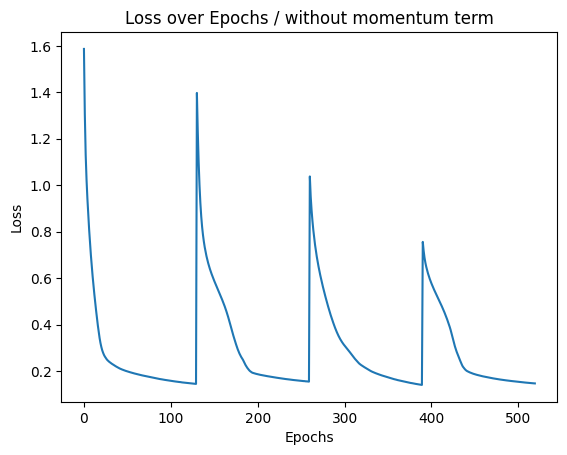

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs / without momentum term')
plt.show()


# Network Analysis

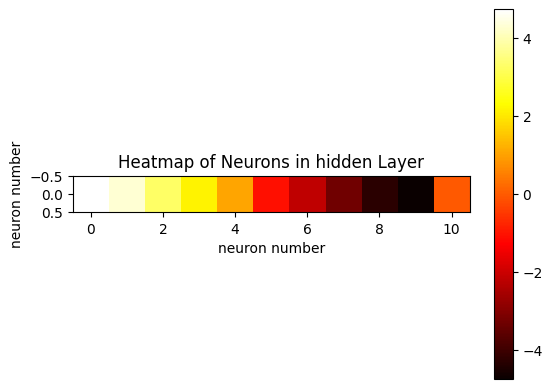

Text(0, 0.5, 'neuron number')

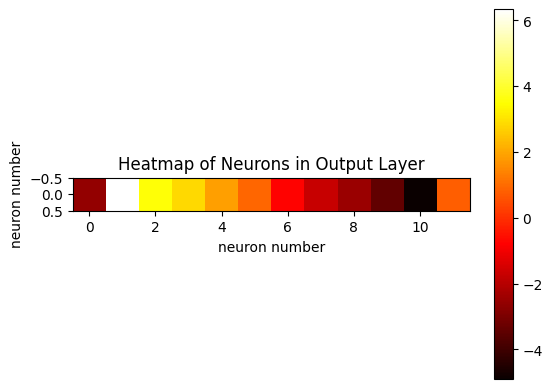

In [ ]:
neuron1weightsbias = [v.data for v in hiddenLayer1.neurons[0].w] + [hiddenLayer1.neurons[0].b.data]
outputneuronweightsbias = [v.data for v in outputLayer.neurons[0].w] + [outputLayer.neurons[0].b.data]
import matplotlib.pyplot as plt

plt.imshow([neuron1weightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in hidden Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')
plt.show()

plt.imshow([outputneuronweightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in Output Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')


In [ ]:
neuron1weightsbias

[4.730257472922613,
 4.291331755432143,
 3.2573443760750886,
 2.1589434171025923,
 1.0555995955264479,
 -1.0670729046272482,
 -2.1616096967604537,
 -3.274597127580454,
 -4.281371961476945,
 -4.751506477851369,
 -0.0151131751890921]

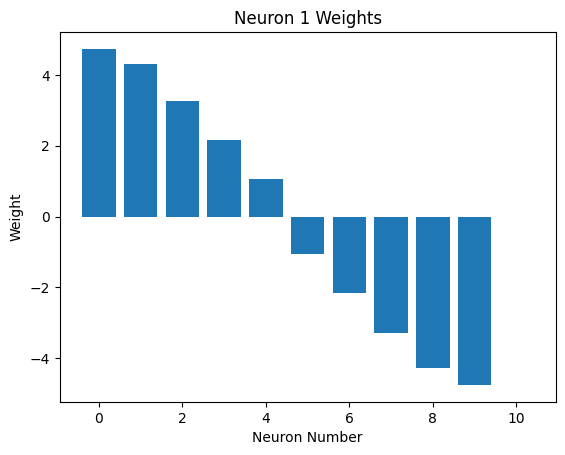

In [ ]:
plt.bar(range(len(neuron1weightsbias)), neuron1weightsbias)
plt.xlabel('Neuron Number')
plt.ylabel('Weight')
plt.title('Neuron 1 Weights')
plt.show()


# with momentum term

In [ ]:
accuracies = []
f1scores = []
precisionscores = []
recallscores = []
losss = []

for i in range(4):
    print('cross no.', i+1)
    Xtrain, Xtest = X[:len(X)*i//4] + X[len(X)*(i+1)//4:], X[len(X)*i//4:len(X)*(i+1)//4] 
    Ytrain, Ytest = Y[:len(X)*i//4] + Y[len(X)*(i+1)//4:], Y[len(X)*i//4:len(X)*(i+1)//4] 

    hiddenLayer1 = Layer(10, 1, activation='reLu')
    outputLayer = Layer(11, 1, activation='sigmoid')
    for i in range(5):
        hiddenLayer1.neurons[0].w[i] = Value(5.0-i)
        hiddenLayer1.neurons[0].w[9-i] = Value(i-5.0)
    for i in range(5):
        outputLayer.neurons[0].w[i+1] = Value(5.0-i)
        outputLayer.neurons[0].w[9-i+1] = Value(i-5.0)
    parameters =  outputLayer.parameters() + hiddenLayer1.parameters()

    prevchange = [0]*len(parameters)
    beta = 0.7 # parameter for momentum update
    lr = 1
    epochs = 130

    for _ in range(epochs):
        Y_pred = [predict(x) for x in Xtrain]
        loss = Value(0)
        for i in range(len(Ytrain)):
            if Ytrain[i] == 1:
                loss -= Y_pred[i].log()
            else:
                loss -= (Value(1) - Y_pred[i]).log()
        loss = loss/len(X)
        loss.backward()

        for ix, p in enumerate(parameters):
            change = lr*p.grad + beta*prevchange[ix]
            p.data = p.data -change
            prevchange[ix] = change

        for p in parameters:
            p.grad = 0
        losss.append(loss.data)
        print('loss:', loss.data,'epoch:', _)
    print( 'accuracy','test', getAccuracy(Xtest, Ytest),'train', getAccuracy(Xtrain, Ytrain))
    print( 'f1score','test', getf1(Xtest, Ytest),'train', getf1(Xtrain, Ytrain))
    print( 'precision','test', getPrecision(Xtest, Ytest),'train', getPrecision(Xtrain, Ytrain))
    print( 'recall','test',getRecall(Xtest, Ytest),'train',getRecall(Xtrain, Ytrain))
    print()
    accuracies.append(getAccuracy(Xtest, Ytest))
    f1scores.append(getf1(Xtest, Ytest))
    precisionscores.append(getPrecision(Xtest, Ytest))
    recallscores.append(getRecall(Xtest, Ytest))

cross no. 1
loss: 0.36868003909601843 epoch: 0
loss: 0.30716981515383796 epoch: 1
loss: 0.23775899611343987 epoch: 2
loss: 0.2762243432739998 epoch: 3
loss: 0.20530656588268192 epoch: 4
loss: 0.20279116917715703 epoch: 5
loss: 0.19290094036838987 epoch: 6
loss: 0.1781452120046021 epoch: 7
loss: 0.17445027116802864 epoch: 8
loss: 0.1680095172815048 epoch: 9
loss: 0.16015565597932327 epoch: 10
loss: 0.15746857189608465 epoch: 11
loss: 0.15072209286440752 epoch: 12
loss: 0.14824549843458112 epoch: 13
loss: 0.1438645786614209 epoch: 14
loss: 0.14154395530516983 epoch: 15
loss: 0.14546039626444338 epoch: 16
loss: 0.14724562106565575 epoch: 17
loss: 0.15168217576472595 epoch: 18
loss: 0.14668469305743176 epoch: 19
loss: 0.13920850995528983 epoch: 20
loss: 0.1400466340618168 epoch: 21
loss: 0.13578913273753201 epoch: 22
loss: 0.13581126633783955 epoch: 23
loss: 0.1339873561400119 epoch: 24
loss: 0.13752733123288272 epoch: 25
loss: 0.1387924765212181 epoch: 26
loss: 0.14231715338456016 epoch: 

In [ ]:
print('final accuracy:', sum(accuracies)/4)
print('final f1score', sum(f1scores)/4)
print('final precisionscore', sum(precisionscores)/4)
print('final recallscore', sum(recallscores)/4)

final accuracy: 0.9501953125
final f1score 0.9531623702972016
final precisionscore 0.9110402541368356
final recallscore 1.0


In [ ]:
[i.data for i in hiddenLayer1.neurons[0].w] + [hiddenLayer1.neurons[0].b.data]

[4.130229565865318,
 5.156892161282381,
 4.022968498866327,
 2.1792732617579484,
 0.9036316169266277,
 -1.0918839311741206,
 -2.336481262518848,
 -4.136072422567298,
 -5.19979213705881,
 -4.200395429503537,
 -0.13505294147048558]

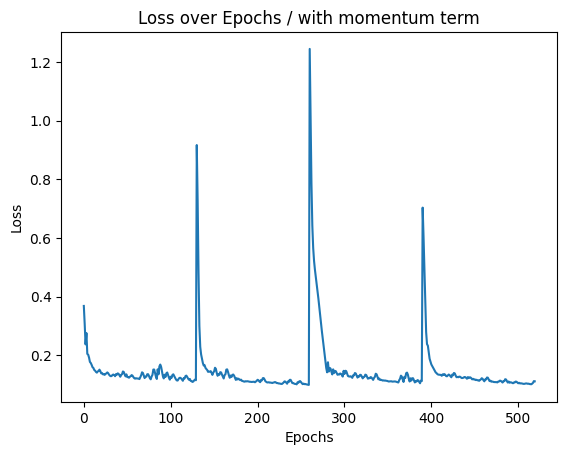

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs / with momentum term')
plt.show()


# Network Analysis

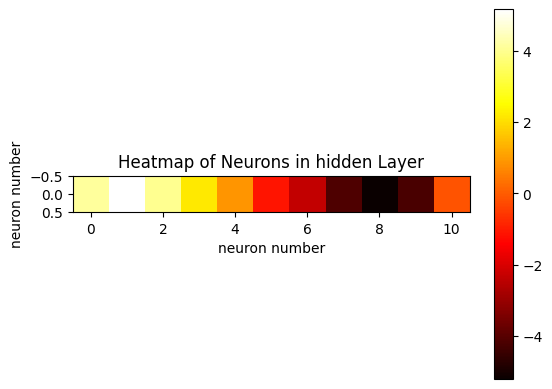

Text(0, 0.5, 'neuron number')

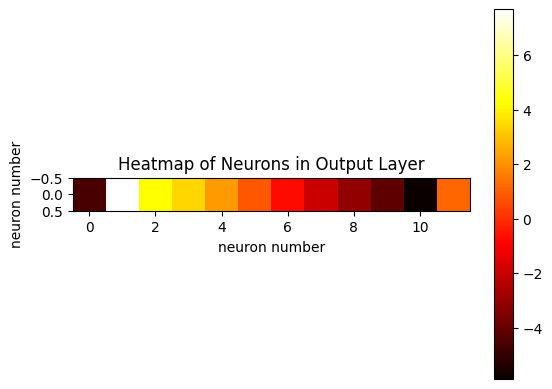

In [ ]:
neuron1weightsbias = [v.data for v in hiddenLayer1.neurons[0].w] + [hiddenLayer1.neurons[0].b.data]
outputneuronweightsbias = [v.data for v in outputLayer.neurons[0].w] + [outputLayer.neurons[0].b.data]
import matplotlib.pyplot as plt

plt.imshow([neuron1weightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in hidden Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')
plt.show()

plt.imshow([outputneuronweightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in Output Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')


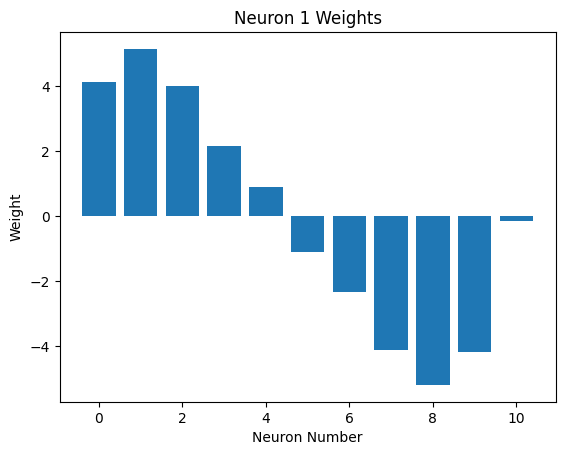

In [ ]:
plt.bar(range(len(neuron1weightsbias)), neuron1weightsbias)
plt.xlabel('Neuron Number')
plt.ylabel('Weight')
plt.title('Neuron 1 Weights')
plt.show()


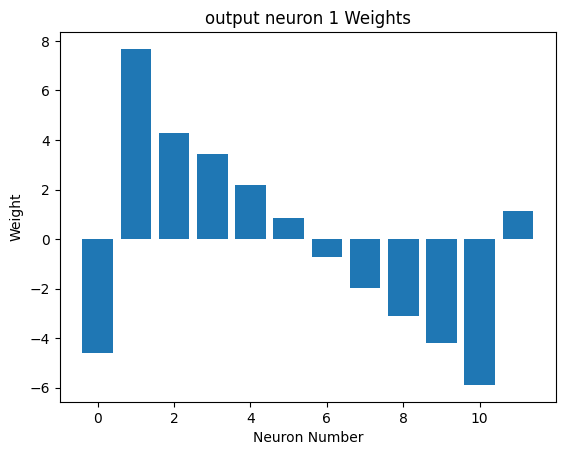

In [ ]:
plt.bar(range(len(outputneuronweightsbias)), outputneuronweightsbias)
plt.xlabel('Neuron Number')
plt.ylabel('Weight')
plt.title('output neuron 1 Weights')
plt.show()


In [ ]:
# create a confustion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax

In [ ]:
def predictArray(X):
    return [1 if predict(x).data > 0.5 else 0 for x in X ]

# Confusion matrix

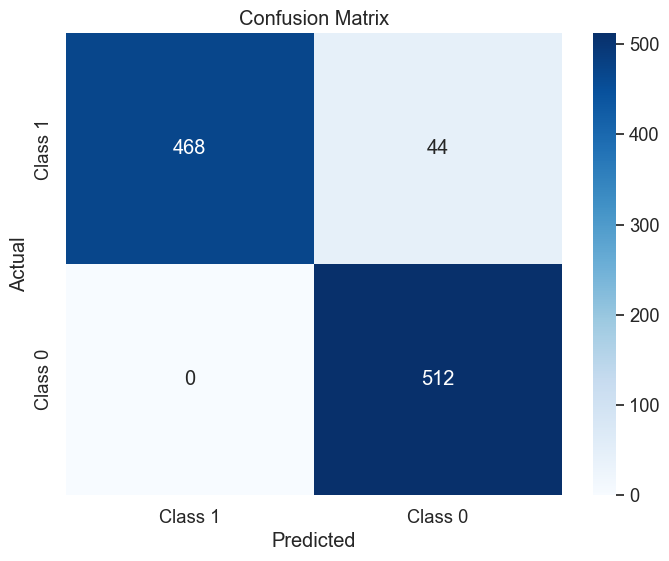

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example confusion matrix data (replace with your own)
y_true = Y
y_pred = predictArray(X)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with numbers
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Class 1', 'Class 0'], 
            yticklabels=['Class 1', 'Class 0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Saving parameters

In [ ]:
import pickle as pkl 

with open('parameters/neuron1weightsbias_fn_reLu.pckl', 'wb') as file:
    pkl.dump(neuron1weightsbias, file)
with open('parameters/outputneuronweightsbias_fn_reLu.pckl', 'wb') as file:
    pkl.dump(outputneuronweightsbias, file)

In [36]:
# Load model

def loadModel():
    neuron1weightsbias, outputneuronweightsbias = [], []
    with open(f'parameters/neuron1weightsbias_fn_reLu.pckl', 'rb') as file:
        neuron1weightsbias = pickle.load(file)
    with open('parameters/outputneuronweightsbias_fn_reLu.pckl', 'rb') as file:
        outputneuronweightsbias = pickle.load(file)
    hiddenLayer1_ = Layer(10, 1, 'reLu')
    outputLayer_ = Layer(11, 1, 'sigmoid')

    hiddenLayer1_.neurons[0].w = [Value(i) for i in neuron1weightsbias[:-1]]
    hiddenLayer1_.neurons[0].b = Value(neuron1weightsbias[-1])

    outputLayer_.neurons[0].w = [Value(i) for i in outputneuronweightsbias[:-1]]
    outputLayer_.neurons[0].b = Value(outputneuronweightsbias[-1])
    return hiddenLayer1_, outputLayer_, neuron1weightsbias, outputneuronweightsbias

In [37]:
import pickle as pkl 

hiddenLayer1, outputLayer, neuron1weightsbias, outputneuronweightsbias = loadModel()